In [5]:
import pandas as pd
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings('ignore')

 # Import the data

In [4]:
data =pd.read_csv("D:/Data Secience/Assignment/Simple Linear Regression/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


 ## Exploratory Data Analyst

In [7]:
df=data.copy()
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
# Data Structure
df.shape

(21, 2)

In [9]:
#Duplicate
df[df.duplicated()].shape

(0, 2)

In [10]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

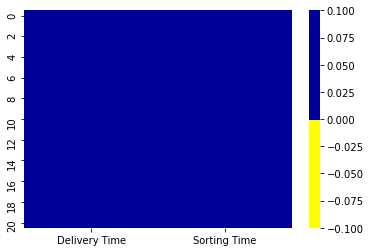

In [11]:
# Missing values and Imputation
cols=df.columns
colours=['#ffff00','#000099']
sns.heatmap(df[cols].isnull(),
           cmap=sns.color_palette(colours))

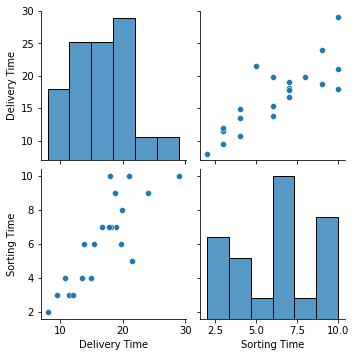

In [12]:
# Scatter plot and Correlation Analysis
sns.pairplot(df)

## Outlier detection
### Box plot and interquartile range

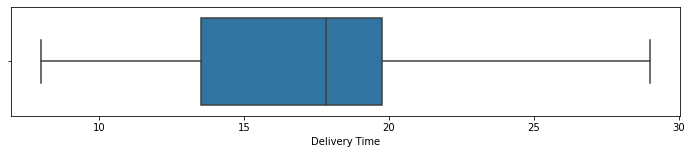

In [21]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Delivery Time'], whis=1.5)

whis=1.5 1st quartile = 13

3rd quartile = 19

Quartile range = (3rd quartile - 1st quartile) = 19-13 = 6

Whisker on the upper side

3rd quartile + (Quartile range whis) = 19+ (6 *1.5) = 19+9 = 18

There is no outliers above the whisker 28.

Whisker on th lower side

1st quartile - (Quartile range whis) = 13 - (6*1.5) = 13-9=4

There is no outliers on the negative side of the lower whisker.

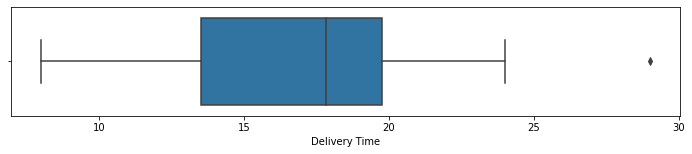

In [19]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Delivery Time'], whis=1)

whis=1 1st quartile = 13

3rd quartile = 19

Quartile range = (3rd quartile - 1st quartile) = 19-13 = 6

Whisker on the upper side

3rd quartile + (Quartile range whis) = 19 + (6 *1) = 19 + 6 = 21

There are 1 outliers above the whisker 25.

### Conclusion for selecting whis = 1.5
So from the above analysis of whis 1 and 1.5, we should select the whis=1.5 quartile range. Because we don't want to miss any of the data in this time series analysis.

In [7]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

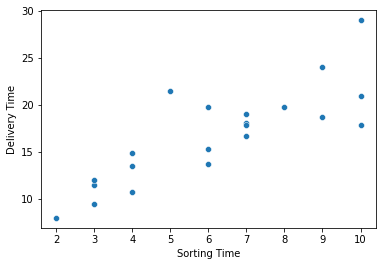

In [12]:
sns.scatterplot(x=data['Sorting Time'], y=data['Delivery Time'])

 # Correlation

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

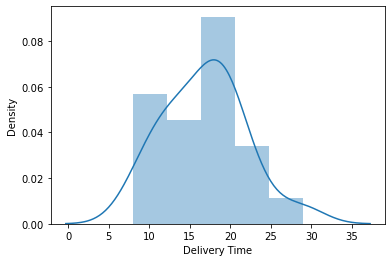

In [21]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

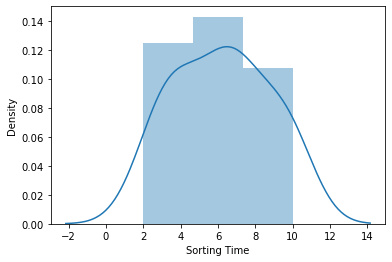

In [23]:
sns.distplot(data['Sorting Time'])

In [58]:
data = data.rename(columns = {'Delivery Time': 'DT','Sorting Time': 'ST'},inplace=False)

In [60]:
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


 # Fitting a Linear Regression Model

In [67]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data=data).fit()

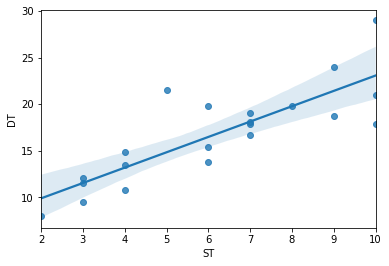

In [68]:
sns.regplot(x="ST", y ="DT", data=data);

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        13:58:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 # Coefficients

In [69]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

 # Predict for new data point

In [70]:
# Predict for 8 and 10 Sorting Time
newdata=pd.Series([8,10])

In [72]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [73]:
model.predict(data_pred)

0    19.774893
1    23.072933
dtype: float64